# A Survey of Asymptotic Techniques

Basic algebra with asymptotic quantities can be automated.

In [1]:
# Setup
assume(SR.an_element() > 0)
SCR = SR.subring(no_variables=True)

In [2]:
# Introduce ring of symbolic expressions
A.<n> = AsymptoticRing(
    growth_group='QQ^n * n^QQ * log(n)^QQ',  # "structure" of the expansions
    coefficient_ring=SCR,
    default_prec=4
)
A

Asymptotic Ring <QQ^n * n^QQ * log(n)^QQ * Signs^n> over Symbolic Constants Subring

In [3]:
# Compute starting asymptotic expansion of 1/(1+n)
show(1/(1+n))

n^(-1) - n^(-2) + n^(-3) - n^(-4) + O(n^(-5))

In [4]:
# Compute starting asymptotic expansion of (1+1/n)^n
show((1+1/n)^n)

e - 1/2*e*n^(-1) + 11/24*e*n^(-2) - 7/16*e*n^(-3) + O(n^(-4))

### Transfer Theorems

We can convert the behaviour of a generating function near its *singularities* to asymptotic behaviour of its coefficient sequence.

For instance, the **Harmonic number sequence**
$ H_n = 1 + \frac{1}{2} + \cdots + \frac{1}{n} $
has generating function 

$$ H(z) = \sum_{n \geq 0}H_n z^n = \frac{-\log(1-z)}{1-z} $$
with a singularity at $z=1$.

In [5]:
def harmonic_gf(z):
    return - log(1 - z) / (1 - z)

# Compute asymptotic expansion of coefficient sequence
H_n = A.coefficients_of_generating_function(
    function=harmonic_gf,
    singularities=(1,),
    precision=5)
show(H_n)

log(n) + euler_gamma + 1/2*n^(-1) + O(n^(-2))

In [6]:
# Compare to 'built-in' asymptotics for Hn
H_n - asymptotic_expansions.HarmonicNumber('n', precision=10)

O(n^(-2))

The **Catalan number sequence**
$$ C_n = \frac{1}{n+1}\binom{2n}{n} $$
has generating function 
$$ C(z) = \sum_{n \geq 0}C_n z^n = \frac{1-\sqrt{1-4z}}{2z} $$
which has a singularity at $z=1/4$ (but not at $z=0$).

In [7]:
def catalan(z):
    return (1 - sqrt(1 - 4*z)) / (2*z)

C_n = A.coefficients_of_generating_function(
    function=catalan,
    singularities=(1/4,),
    precision=5
)
show(C_n)

1/sqrt(pi)*4^n*n^(-3/2) - 9/8/sqrt(pi)*4^n*n^(-5/2) + 145/128/sqrt(pi)*4^n*n^(-7/2) - 1155/1024/sqrt(pi)*4^n*n^(-9/2) + 36939/32768/sqrt(pi)*4^n*n^(-11/2) + O(4^n*n^(-6))

In [8]:
# Compare to 'built-in' asymptotics for binomial coefficients
c_n = asymptotic_expansions.Binomial_kn_over_n('n', k=2, precision=3)/(1+n)
c_n - C_n

O(4^n*n^(-9/2))

## Saddle-Point Method

When generating functions have no singularities, their coefficients often grow (or decay) rapidly. In this case, asymptotics can be computed by approximating generating functions near peaks in their behaviour.

**Problem (V. I. Arnold's Problems for Children 5 to 15 Years Old):** Approximate 
$$ \int_0^{2\pi} \sin(x)^{100} dx $$
with error of no more than 10\%

In [9]:
# Technically solvable exactly with a computer algebra system,
# but this is cheating (and what if 100 -> 1000000)
integral(sin(x)^100,x)

-25/55169095435288576*sin(2*x)^49 + 325/1653665488175104*sin(2*x)^47 - 897/35184372088832*sin(2*x)^45 + 148005/94557999988736*sin(2*x)^43 - 10015005/180319906955264*sin(2*x)^41 + 350175/274877906944*sin(2*x)^39 - 206253075/10170482556928*sin(2*x)^37 + 3535767/15032385536*sin(2*x)^35 - 17678835/8589934592*sin(2*x)^33 + 1870935/134217728*sin(2*x)^31 - 9999825/134217728*sin(2*x)^29 + 2674525/8388608*sin(2*x)^27 + 1/3777893186295716170956800*sin(4*x)^25 - 463120749/419430400*sin(2*x)^25 - 122539/434457716424007359660032*sin(4*x)^23 + 75207643/24117248*sin(2*x)^23 + 34629881/9444732965739290427392*sin(4*x)^21 - 52978783/7340032*sin(2*x)^21 - 13542833395/2361183241434822606848*sin(4*x)^19 + 449735/32768*sin(2*x)^19 + 285/137438953472*sin(4*x)^17 - 5620485/262144*sin(2*x)^17 - 22105274872677/92233720368547758080*sin(4*x)^15 + 1124097/40960*sin(2*x)^15 + 99570488676057/9223372036854775808*sin(4*x)^13 - 234479/8192*sin(2*x)^13 - 6773025/309485009821345068724781056*sin(8*x)^11 - 500552983097437/

We can compute the integral from $0$ to $\pi$ and then double.

**Idea:** On $[0,\pi]$ the function $\sin x$ has peak value $1$ at $x=\pi/2$.

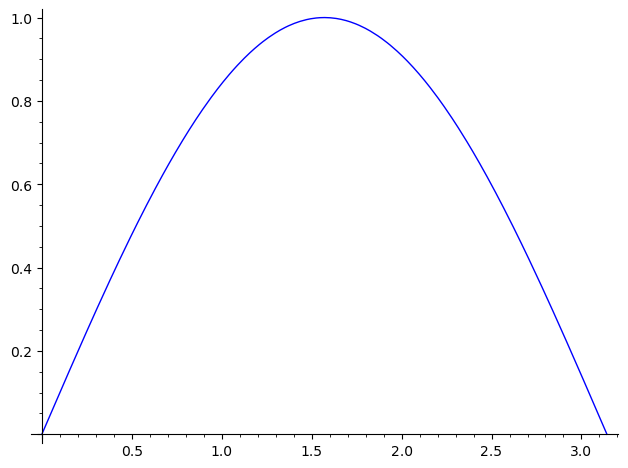

In [10]:
plot(sin(x),x,0,pi)

So the function $\sin(x)^{100}$ is very concentrated around $x=\pi/2$

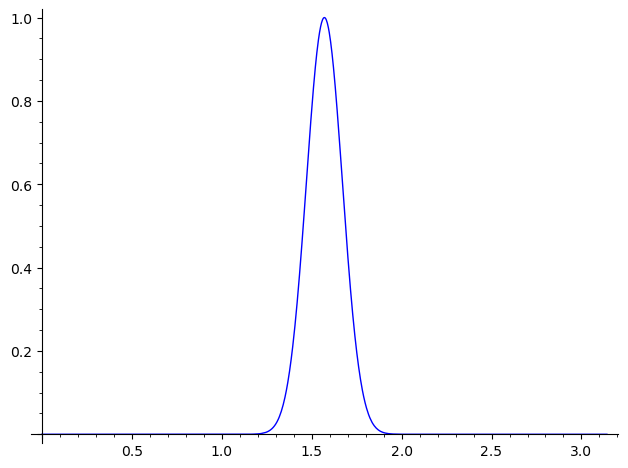

In [11]:
plot(sin(x)^100,x,0,pi)

It is enough to approximate $\sin(x)^{100}$ near the peak and then determine the integral.

The expansion

In [12]:
log(sin(x+pi/2)).series(x,5)

(-1/2)*x^2 + (-1/12)*x^4 + Order(x^5)

Implies 
$$ \sin(x)^{100} = e^{100 \log( \sin x)} \approx e^{-100 (x-\pi/2)^2/2} $$
so

$$ \int_0^{2\pi} \sin(x)^{100} dx = 2 \int_0^{\pi} e^{100 \log (\sin x)} dx \approx 2 \int_0^\pi e^{-50(x-\pi/2)^2} dx = 2 \int_{-\pi/2}^{\pi/2} e^{-50t^2} dt  $$

Because $e^{-50t^2}$ decays so fast away from the origin, we can integrate over the entire real line while adding only minor error.

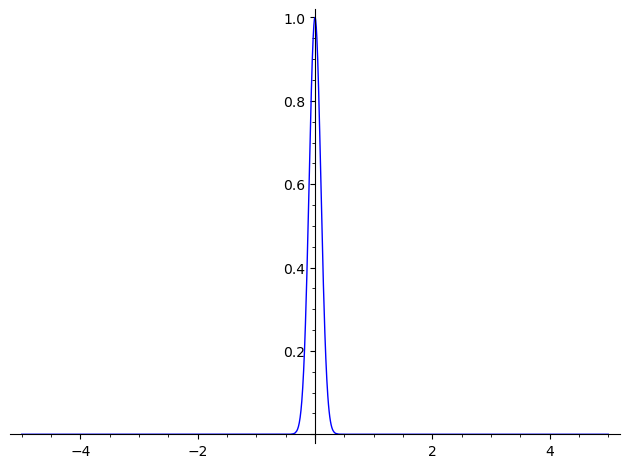

In [13]:
plot(exp(-50*x^2),x,-5,5)

Thus, we see
$$ \int_0^{2\pi} \sin(x)^{100} dx \approx 2 \int_{-\infty}^{\infty} e^{-50t^2} dt$$

The final integral follows from the well-known formula
$$ \int_{-\infty}^{\infty} e^{-\lambda t^2} dt = \sqrt{\pi/\lambda} $$
giving
$$ \int_0^{2\pi} \sin(x)^{100} dx \approx \frac{\sqrt{2 \pi}}{5}$$

In [14]:
print((sqrt(2*pi)/5).n())
print(integral(sin(x)^100,x,0,2*pi).n())

0.501325654926200
0.500073926960750


Generalizing the argument, we've (sketched) the asymptotic approximation
$$ \int_0^{2\pi} \sin(x)^{100} dx \sim 2 \sqrt{\frac{2 \pi}{n}}$$

In general, we will use **Cauchy's integral formula** from complex analysis to represent a sequence using a (complex) integral of its generating function. 

## Automated Asymptotics

In many cases, generating functions are not given explicitly but defined by algebraic/differential/functional equations. 

We can often work *implicitly* with the generating functions using these equations as **data structures**

### C-Finite Sequences
A **C-Finite sequence** satisfies a non-trivial linear recurrence with constant coefficients.

In [15]:
C.<z> = CFiniteSequences(QQ)
print(C)

The ring of C-Finite sequences in z over Rational Field


In [16]:
# Define sequence satisfying v_{n+2} = v_{n+1} + v_n with v_0 = v_1 = 1
fib = C.from_recurrence([1,1],[1,1]) 
fib

C-finite sequence, generated by -1/(z^2 + z - 1)

In [17]:
# C-finite sequences can also be defined by their rational generating function
fib2 = C('1/(1-z-z^2)')
print(fib2)
print(fib==fib2)

C-finite sequence, generated by -1/(z^2 + z - 1)
True


In [18]:
# Series truncations can be computed from the sequence
fib.series(10)

1 + x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + O(x^10)

In [19]:
# Sequence terms can also be accessed directly
print(fib[1000])

70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501


In [20]:
# Sage can find the closed form of the sequence in terms of algebraic numbers
show(fib.closed_form())

1/2*(1/2*sqrt(5) + 1/2)^n*(sqrt(1/5) + 1) - 1/2*(-1/2*sqrt(5) + 1/2)^n*(sqrt(1/5) - 1)

In [21]:
# Sage can also guess a C-recurrence from a list of initial values
C.guess([1,1,2,3,5,8])

C-finite sequence, generated by -1/(x^2 + x - 1)

### P-Recursive Sequences
A **P-recursive sequence** satisfies a linear recurrence with *polynomial* coefficients.

We can model a P-recursion using the **Shift algebra** consisting of polynomials in $S_n$ and $n$ such that $S_n n = (n+1)S_n$. 

Such polynomials act on sequences via 

$$n \cdot (f_n) = (nf_n) \qquad\qquad S_n \cdot (f_n) = (f_{n+1})$$

The Shift algebra is implemented in the Sage [ore_algebra](https://github.com/mkauers/ore_algebra/) package (Kauers, Jaroschek, Johansson, Mezzarobba, Verron, ...)

In [22]:
# Define the ring of shift operators to encode P-recurrence
from ore_algebra import *
Ind.<n> = PolynomialRing(QQ); Shift.<Sn> = OreAlgebra(Ind)

In [23]:
# Algebraic Simplification
Sn * n

(n + 1)*Sn

We can generate terms in sequences.

In [24]:
# Central binomial coefficients
rec = (n + 1)*Sn - 4*n - 2 
rec.to_list([1],10)

[1, 2, 6, 20, 70, 252, 924, 3432, 12870, 48620]

In [25]:
[binomial(2*k,k) for k in range(10)]

[1, 2, 6, 20, 70, 252, 924, 3432, 12870, 48620]

We can also *guess* P-recursions.

In [26]:
LST = [binomial(2*k,k)^2 for k in range(10)]
LST

[1, 4, 36, 400, 4900, 63504, 853776, 11778624, 165636900, 2363904400]

In [27]:
guess(LST,Shift)

(-n^2 - 2*n - 1)*Sn + 16*n^2 + 16*n + 4

### Lattice Path Example
Let $s_n$ be the number of lattice paths on the steps $\{\text{North, South, East, West}\} = \{(\pm1,0),(0,\pm1)\}$ that start at the origin and stay in $\mathbb{N}^2$. 

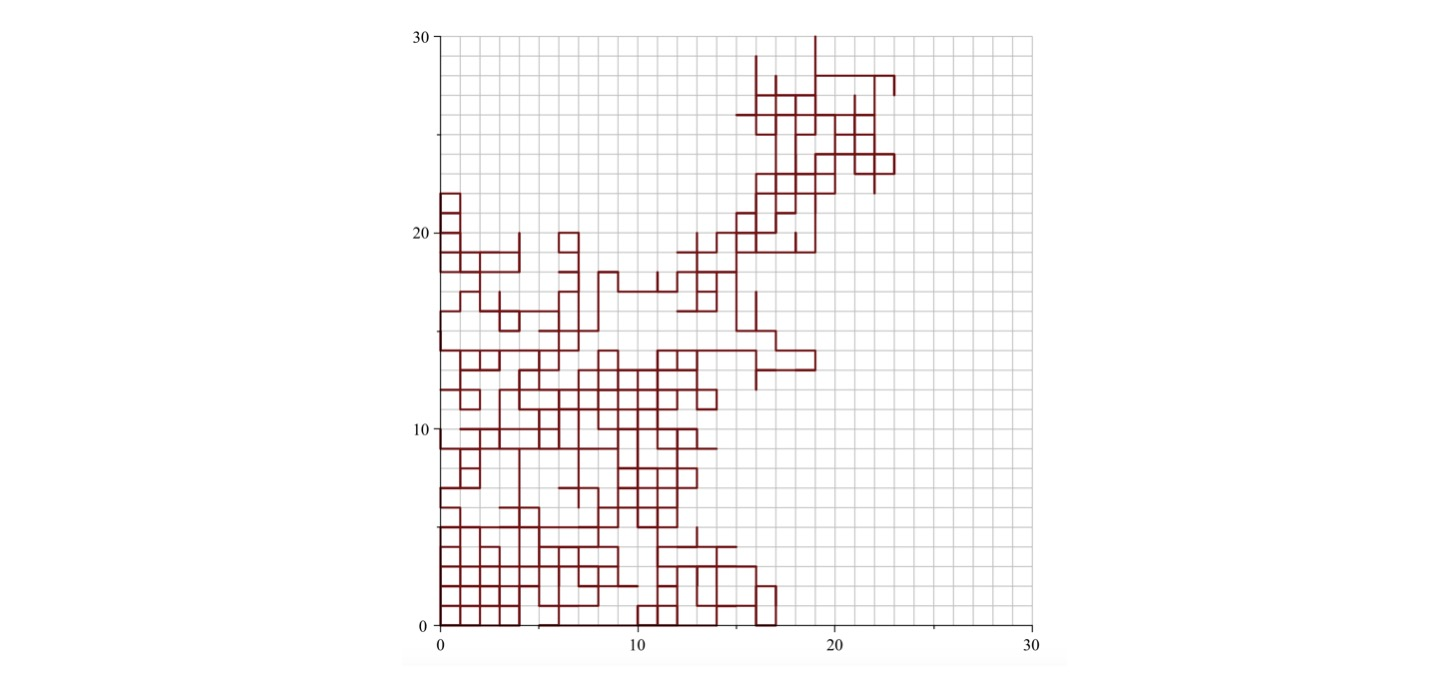

We can numerically compute terms in the counting sequence, then guess a P-recurrence it satisfies.

In [28]:
@CachedFunction 
def NSEW(i,j,n):
    if i<0 or j<0:               return 0
    elif n==0 and i==0 and j==0: return 1
    elif n==0:                   return 0
    else:                        return NSEW(i-1,j,n-1) + NSEW(i,j-1,n-1) + NSEW(i+1,j,n-1) + NSEW(i,j+1,n-1)
    
def s(n): return add([NSEW(i,j,n) for i in range(n+1) for j in range(n+1)])

print([s(n) for n in range(10)])

[1, 2, 6, 18, 60, 200, 700, 2450, 8820, 31752]


In [29]:
rec = guess([s(n) for n in range(50)], Shift)
rec

(-n^2 - 7*n - 12)*Sn^2 + (8*n + 20)*Sn + 16*n^2 + 48*n + 32

The solutions of a P-recurrence form a $\mathbb{C}$-vector space, and we can compute series expansions of an *asymptotic basis*.

In [30]:
rec = (-n^2 - 7*n - 12)*Sn^2 + (8*n + 20)*Sn + 16*n^2 + 48*n + 32
show(rec.generalized_series_solutions(n=3))

[4^n*n^(-1)*(1 - 3/2*n^(-1) + 19/8*n^(-2) + O(n^(-3))),
 (-4)^n*n^(-3)*(1 - 9/2*n^(-1) + 107/8*n^(-2) + O(n^(-3)))]

Thus, there exist $\lambda_1,\lambda_2 \in \mathbb{C}$ such that

$$ s_n = \lambda_1 \frac{4^n}{n}\left(1 - \frac{3}{2n} + \cdots\right) + \lambda_2 \frac{(-4)^n}{n^2}\left(1 - \frac{9}{2n} + \cdots\right) $$

*How do we find $\lambda_1,\lambda_2$?   
How do we **prove** $\lambda_1 \neq 0$?* 

Move to **differential equations** for GFs and use **transfer theorems** (to be discussed) to approximate to rigorous accuracy. Move to **multivariate representations** to get exactly.

**Recent Application (Melczer and Mezzarobba 2022):** Prove uniqueness for a model predicting the shape of genus one biomembranes.

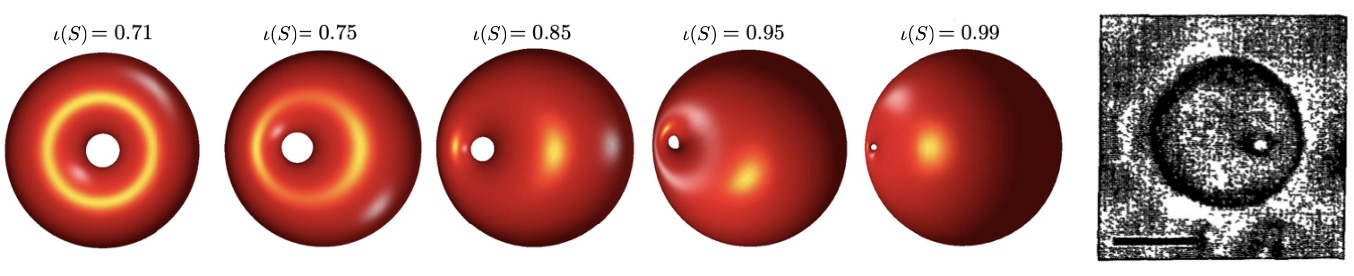

We will see many types of generating functions, and will adapt techniques from all over mathematics to determine asymptotics.

More applications and examples available in Chapter 1 of [enumeration.ca](https://enumeration.ca).